<a href="https://colab.research.google.com/github/Jaztin-F/ITBAN3/blob/main/LabActivity2_Francsico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount the drive to use the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Import Packages

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

2. Import and load the dataset. Set the client_id as the index.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Francisco | Colab Notebooks/loans.csv', index_col='client_id')

3. Display the contents of the dataset by showing its first 5 rows.

In [ ]:
print("First 5 rows of the dataset:")
df.head(5)

First 5 rows of the dataset:


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


4. Check the info and datatypes

In [ ]:
print("\nInfo of the dataset:")
df.info()


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


5. Check for missing values

In [ ]:
print("\nMissing values in the dataset:")
df.isnull().sum()



Missing values in the dataset:


loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

6. Check for outliers using Boxplot

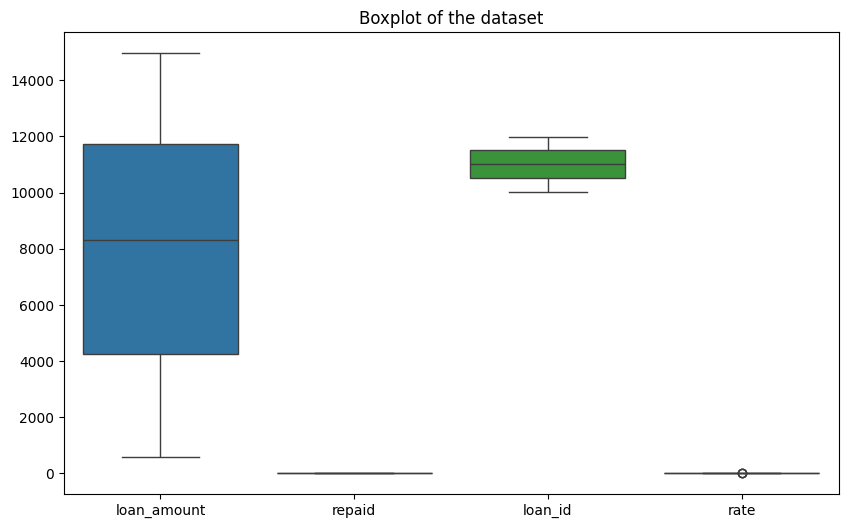

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of the dataset")
plt.show()

7. Treat outliers using SQRT transformation and Z-Score capping

In [ ]:
# SQRT transformation
df['Rate_SQRT'] = np.sqrt(df['rate'])

In [ ]:
# Z-Score capping

from scipy.stats import zscore
df['rate_zscores'] = zscore(df['rate'])

treshold = 2
df['rate_capped'] = df['rate'].where((df['rate_zscores']< treshold) & (df['rate_zscores']> -treshold), np.nan)

8. Apply Min-Max Normalization for numerical variables

Text(0.5, 1.0, 'Histogram of Loan Amount')

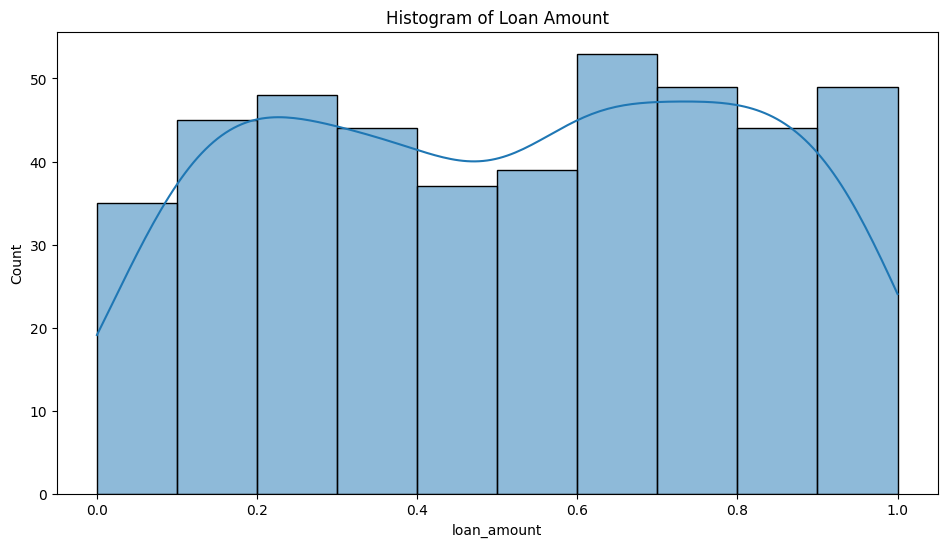

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['loan_amount']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display skewness and kurtosis graphs for Loan Amount
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['loan_amount'], kde=True)
plt.title("Histogram of Loan Amount")

9. Encode categorical variables into dummy variables

In [ ]:
df = pd.get_dummies(df, columns=['loan_type'], drop_first=True)

# Display the first five rows after encoding
print("\nFirst 5 rows after encoding:")
df.head(5)



First 5 rows after encoding:


,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Rate_SQRT,rate_zscores,rate_capped,loan_type_credit,loan_type_home,loan_type_other
client_id,,,,,,,,,,,,
46109,0.909867,0,10243,2002-04-16,2003-12-20,2.15,1.466288,-0.445677,2.15,0,1,0
46109,0.640785,0,10984,2003-10-21,2005-07-17,1.25,1.118034,-0.821544,1.25,1,0,0
46109,0.844782,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-1.059594,0.68,0,1,0
46109,0.829795,1,10596,2010-12-08,2013-05-05,1.24,1.113553,-0.825721,1.24,0,0,0
46109,0.936026,1,11415,2010-07-07,2012-05-21,3.13,1.769181,-0.036399,3.13,1,0,0


10. Create new derived features for loan tenure

In [ ]:
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])
df['Loan_Tenure'] = (df['loan_end'] - df['loan_start']).dt.days

11. Split the data into training and test sets (80-20 division)

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('repaid', axis=1)
y = df['repaid']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
